In [1]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import time
from os.path import exists

from sklearn import tree
from sklearn import ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import datetime
import draw_cnf_mat

In [2]:
data = np.loadtxt('data/latent_fpkm_gistic_rppa.csv', delimiter=',')
print(data.shape)

labels = np.loadtxt('data/encoded_labels.csv')
print(labels.shape)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


now = datetime.datetime.now()
Time_Now= now.strftime("%Y-%m-%d %H:%M:%S")

PC= 'Lenovo'
dataset= 'Pan'
print("Shape of Train Data : {}".format(x_train.shape))
print("Shape of Test Data : {}".format(x_test.shape))
print ('All samples:', x_train.shape[0] + x_test.shape[0])

target_names=['LumA','LumB', 'Basal', 'Her2',]


(511, 100)
(511,)
Shape of Train Data : (408, 100)
Shape of Test Data : (103, 100)
All samples: 511


In [3]:
#produce results

path='data/results_fpkm_gistic_rppa/results_ensembl_ML'

def write_results(results, path):
    
    file_exists = exists(path)
    if not(file_exists):
        with open(path,"a+") as f:
            f.write(results)
            f.write("\n")
    else:
        with open(path,"a+") as f:
            f.write(results)

In [4]:
#Using Random Forest Classifier
t1=time.time()
rf_clf = ensemble.RandomForestClassifier(n_estimators=1)
rf_clf.fit(x_train, y_train)
acc_rf=rf_clf.score(x_test, y_test)

rf_pred=rf_clf.predict(x_test)

print(classification_report(y_test, rf_pred, target_names=target_names), '\n')
confus_matrix= classification_report(y_test, rf_pred, target_names=target_names)


acc= accuracy_score(y_test, rf_pred)
prc =  precision_score(y_test, rf_pred, average='micro')
rec = recall_score(y_test, rf_pred, average='micro')
f1 =  f1_score(y_test, rf_pred, average='micro')

t2=time.time()

results='Random Forest Classfier:\n'
results +='Acc: %.2f' % (acc*100) + ', Pre: %.2f' % (prc*100)
results += ', Rec: %.2f' % (rec*100) + ', F1: %.2f' % (f1*100) + ', PC: ' + PC + ', Time: ' + str(round(t2-t1))
results +=  'Dataset: ' + dataset  + ', Date:' + Time_Now + '\n'

results += 'Confusion matrix : \n' + confus_matrix + '===========================\n'

write_results(results, path)

mcm = multilabel_confusion_matrix(y_test, rf_pred)


              precision    recall  f1-score   support

        LumA       0.88      0.93      0.91        57
        LumB       0.56      0.50      0.53        18
       Basal       1.00      0.92      0.96        13
        Her2       0.67      0.67      0.67        15

    accuracy                           0.82       103
   macro avg       0.78      0.75      0.77       103
weighted avg       0.81      0.82      0.81       103
 



In [5]:
# Using simple Decision Tree classifier
t1=time.time()
dt_clf = tree.DecisionTreeClassifier(max_depth=7)
dt_clf.fit(x_train, y_train)
acc_dt=dt_clf.score(x_test, y_test)

t2=time.time()



dt_pred=dt_clf.predict(x_test)

print(classification_report(y_test, dt_pred, target_names=target_names), '\n')
confus_matrix= classification_report(y_test, dt_pred, target_names=target_names)


#conf_matrix = confusion_matrix(y_true=y_test, y_pred=dt_pred)
acc = accuracy_score(y_test, dt_pred)
prc = precision_score(y_test, dt_pred, average='micro')
rec = recall_score(y_test, dt_pred, average='micro')
f1 = f1_score(y_test, dt_pred, average='micro')


results='Decision Tree classifier:\n'
results +='Acc: %.2f' % (acc*100) + ', Pre: %.2f' % (prc*100)
results += ', Rec: %.2f' % (rec*100) + ', F1: %.2f' % (f1*100) + ', PC: ' + PC + ', Time: ' + str(round(t2-t1))
results +=  'Dataset: ' + dataset  + ', Date:' + Time_Now + '\n'
  

results += 'Confusion matrix : \n' + confus_matrix + '===========================\n'

write_results(results, path)


              precision    recall  f1-score   support

        LumA       0.81      0.89      0.85        57
        LumB       0.36      0.28      0.31        18
       Basal       0.81      1.00      0.90        13
        Her2       0.60      0.40      0.48        15

    accuracy                           0.73       103
   macro avg       0.64      0.64      0.63       103
weighted avg       0.70      0.73      0.71       103
 



In [6]:
#Using Gradient Boosting Classifier
t1=time.time()
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)
acc_gb=gb_clf.score(x_test, y_test)

gb_pred=gb_clf.predict(x_test)

print(classification_report(y_test, gb_pred, target_names=target_names), '\n')
confus_matrix= classification_report(y_test, gb_pred, target_names=target_names)


acc= accuracy_score(y_test, gb_pred)
prc =  precision_score(y_test, gb_pred, average='micro')
rec = recall_score(y_test, gb_pred, average='micro')
f1 = f1_score(y_test, gb_pred, average='micro')

t2=time.time()


results='Gradient Boosting Classifier:\n'
results +='Acc: %.2f' % (acc*100) + ', Pre: %.2f' % (prc*100)
results += ', Rec: %.2f' % (rec*100) + ', F1: %.2f' % (f1*100) + ', PC: ' + PC + ', Time: ' + str(round(t2-t1))
results +=  'Dataset: ' + dataset  + ', Date:' + Time_Now + '\n'
  

results += 'Confusion matrix : \n' + confus_matrix + '===========================\n'

write_results(results, path)


              precision    recall  f1-score   support

        LumA       0.88      0.91      0.90        57
        LumB       0.40      0.44      0.42        18
       Basal       0.93      1.00      0.96        13
        Her2       0.80      0.53      0.64        15

    accuracy                           0.79       103
   macro avg       0.75      0.72      0.73       103
weighted avg       0.79      0.79      0.78       103
 



In [7]:
#Using Naive Bayes Classifier
t1= time.time()
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
# evaluaye the accuracy by this instruction
acc_nb=nb_clf.score(x_test, y_test)
# Or by this, 
#predict the response for test dataset
#y_pred = nb1_clf.predict(x_test)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
nb_pred=nb_clf.predict(x_test)

print(classification_report(y_test, nb_pred, target_names=target_names), '\n')
confus_matrix= classification_report(y_test, nb_pred, target_names=target_names)

acc = accuracy_score(y_test, nb_pred)
prc = precision_score(y_test, nb_pred, average='micro')
rec = recall_score(y_test, nb_pred, average='micro')
f1 = f1_score(y_test, nb_pred, average='micro')

t2=time.time()


results='Naive Bayes Classifier:\n'
results +='Acc: %.2f' % (acc*100) + ', Pre: %.2f' % (prc*100)
results += ', Rec: %.2f' % (rec*100) + ', F1: %.2f' % (f1*100) + ', PC: ' + PC + ', Time: ' + str(round(t2-t1))
results +=  'Dataset: ' + dataset  + ', Date:' + Time_Now + '\n'
  

results += 'Confusion matrix : \n' + confus_matrix + '===========================\n'

write_results(results, path)



              precision    recall  f1-score   support

        LumA       0.94      0.81      0.87        57
        LumB       0.48      0.72      0.58        18
       Basal       1.00      1.00      1.00        13
        Her2       0.79      0.73      0.76        15

    accuracy                           0.81       103
   macro avg       0.80      0.82      0.80       103
weighted avg       0.84      0.81      0.82       103
 



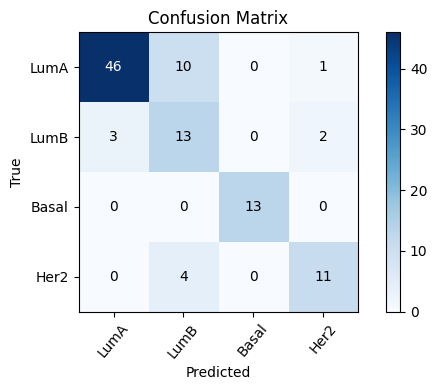

In [8]:
draw_cnf_mat.draw(y_test, nb_pred, "Naive Bayes", target_names)

In [9]:
#Using K-nearest neighbors Classifier


t1= time.time()
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(x_train, y_train)
acc_knn_clf=knn_clf.score(x_test, y_test)

knn_pred=knn_clf.predict(x_test)

print(classification_report(y_test, knn_pred, target_names=target_names), '\n')
confus_matrix= classification_report(y_test, knn_pred, target_names=target_names)


acc = accuracy_score(y_test, knn_pred)
prc = precision_score(y_test, knn_pred, average='micro')
rec = recall_score(y_test, knn_pred, average='micro')
f1 = f1_score(y_test, knn_pred, average='micro')

t2=time.time()

results='K-nearest neighbors Classifier:\n'
results +='Acc: %.2f' % (acc*100) + ', Pre: %.2f' % (prc*100)
results += ', Rec: %.2f' % (rec*100) + ', F1: %.2f' % (f1*100) + ', PC: ' + PC + ', Time: ' + str(round(t2-t1))
results +=  'Dataset: ' + dataset  + ', Date:' + Time_Now + '\n'
  

results += 'Confusion matrix : \n' + confus_matrix + '===========================\n'

write_results(results, path)


              precision    recall  f1-score   support

        LumA       0.79      0.98      0.88        57
        LumB       0.56      0.28      0.37        18
       Basal       0.93      1.00      0.96        13
        Her2       0.89      0.53      0.67        15

    accuracy                           0.80       103
   macro avg       0.79      0.70      0.72       103
weighted avg       0.78      0.80      0.77       103
 



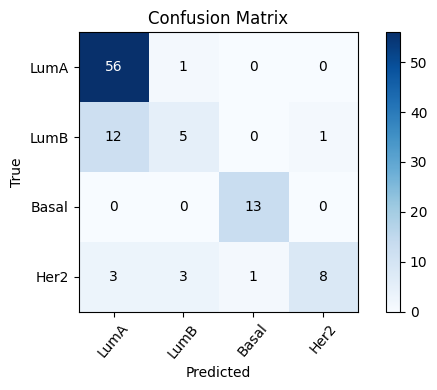

In [10]:
draw_cnf_mat.draw(y_test, knn_pred, "KNN", target_names)

In [11]:
#Using Logistic Regression Classifier
t1= time.time()
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)
acc_lr=lr_clf.score(x_test, y_test)

lr_pred=lr_clf.predict(x_test)

print(classification_report(y_test, lr_pred, target_names=target_names), '\n')
confus_matrix= classification_report(y_test, lr_pred, target_names=target_names)


acc = accuracy_score(y_test, lr_pred)
prc = precision_score(y_test, lr_pred, average= 'micro')
rec = recall_score(y_test, lr_pred, average='micro')
f1 = f1_score(y_test, lr_pred, average='micro')

t2=time.time()

results='Logistic Regression Classifier:\n'
results +='Acc: %.2f' % (acc*100) + ', Pre: %.2f' % (prc*100)
results += ', Rec: %.2f' % (rec*100) + ', F1: %.2f' % (f1*100) + ', PC: ' + PC + ', Time: ' + str(round(t2-t1))
results +=  'Dataset: ' + dataset  + ', Date:' + Time_Now + '\n'
  

results += 'Confusion matrix : \n' + confus_matrix + '===========================\n'

write_results(results, path)



              precision    recall  f1-score   support

        LumA       0.73      1.00      0.84        57
        LumB       0.75      0.17      0.27        18
       Basal       0.62      1.00      0.76        13
        Her2       0.00      0.00      0.00        15

    accuracy                           0.71       103
   macro avg       0.52      0.54      0.47       103
weighted avg       0.61      0.71      0.61       103
 



/home/alandoli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alandoli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alandoli/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alandoli/.local/lib/pytho

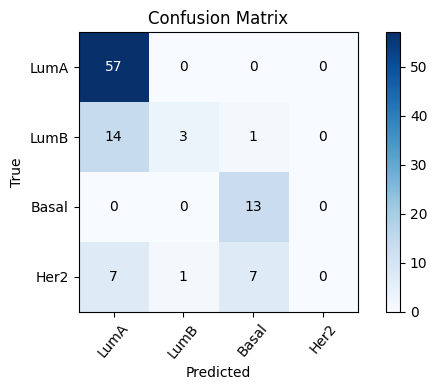

In [12]:
draw_cnf_mat.draw(y_test, lr_pred, "Logistic Regression", target_names)

In [13]:
#Using SVM Classifier
t1= time.time()
svm_clf = SVC(probability=True)
svm_clf.fit(x_train, y_train)
acc_svm=svm_clf.score(x_test, y_test)
t2=time.time()
print("Accuracy of SVM Classifier :",acc_svm, " time: ", (t2-t1))

svm_pred=svm_clf.predict(x_test)

print(classification_report(y_test, svm_pred), '\n')
confus_matrix= classification_report(y_test, svm_pred, target_names=target_names)

acc = accuracy_score(y_test, svm_pred)
prc = precision_score(y_test, svm_pred, average='micro')
rec = recall_score(y_test, svm_pred, average='micro')
f1 = f1_score(y_test, svm_pred, average= 'micro')

results='SVM Classifier:\n'
results +='Acc: %.2f' % (acc*100) + ', Pre: %.2f' % (prc*100)
results += ', Rec: %.2f' % (rec*100) + ', F1: %.2f' % (f1*100) + ', PC: ' + PC + ', Time: ' + str(round(t2-t1))
results +=  'Dataset: ' + dataset  + ', Date:' + Time_Now + '\n ============== \n'
  

results += 'Confusion matrix : \n' + confus_matrix + '===========================\n'

write_results(results, path)


Accuracy of SVM Classifier : 0.8543689320388349  time:  0.05200314521789551
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93        57
         1.0       0.59      0.56      0.57        18
         2.0       1.00      1.00      1.00        13
         3.0       0.90      0.60      0.72        15

    accuracy                           0.85       103
   macro avg       0.84      0.78      0.81       103
weighted avg       0.85      0.85      0.85       103
 



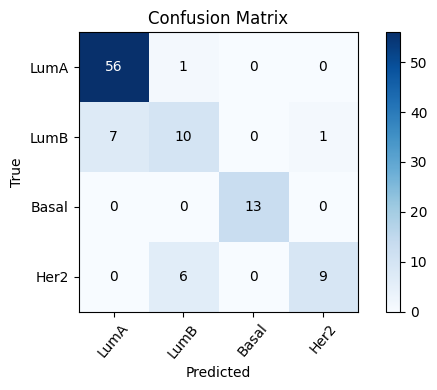

In [14]:
draw_cnf_mat.draw(y_test, svm_pred, "SVM", target_names)